In [1]:
execfile('setting.py')

In [2]:
df_raw=pd.read_csv("/home/piai/Downloads/css.csv")
df_raw.head(10)

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,invoice,product_code,product_name,quantity,date,unit_price,customer_id,...,pop_size,city_type,city_lctn,stock_type,QuantityCanceled,real_quantity,real_sales,margin,quarter,Refund_OX
0,0,0,0,539993,22386,JUMBO BAG PINK POLKADOT,10,2021-01-04,1.95,E13313,...,small,sightseeing,other,consignment,0,10,19.50,1.950,1,0
1,1,1,1,560915,22386,JUMBO BAG PINK POLKADOT,10,2021-07-21,2.08,E13313,...,small,sightseeing,other,consignment,0,10,20.80,2.080,3,0
2,2,2,2,545602,22386,JUMBO BAG PINK POLKADOT,1,2021-03-04,1.95,E17315,...,big,metro,east,consignment,0,1,1.95,0.195,1,0
3,3,3,3,548150,22386,JUMBO BAG PINK POLKADOT,1,2021-03-29,1.95,E17315,...,big,metro,east,consignment,0,1,1.95,0.195,1,0
4,4,4,4,554090,22386,JUMBO BAG PINK POLKADOT,2,2021-05-22,2.08,E17315,...,big,metro,east,consignment,0,2,4.16,0.416,2,0
5,5,5,5,559336,22386,JUMBO BAG PINK POLKADOT,2,2021-07-07,2.08,E17315,...,big,metro,east,consignment,0,2,4.16,0.416,3,0
6,6,6,6,546249,22386,JUMBO BAG PINK POLKADOT,6,2021-03-10,1.95,E14606,...,middle,sightseeing,west,consignment,0,6,11.70,1.170,1,0
7,7,7,7,551194,22386,JUMBO BAG PINK POLKADOT,1,2021-04-27,2.08,E14606,...,middle,sightseeing,west,consignment,0,1,2.08,0.208,2,0
8,8,8,8,556887,22386,JUMBO BAG PINK POLKADOT,2,2021-06-15,2.08,E14606,...,middle,sightseeing,west,consignment,0,2,4.16,0.416,2,0
9,9,9,9,557577,22386,JUMBO BAG PINK POLKADOT,2,2021-06-21,2.08,E14606,...,middle,sightseeing,west,consignment,0,2,4.16,0.416,2,0


In [5]:
df_raw.shape
#customer_id 기준으로 구매 횟수, 평균 구매 간격, 최근 구매일로부터 날짜 차이, 총 구매 가격 제일 많이 사는 제품군, 사는 quantity, 주로 구매하는 제품
#사는 city 유형 city_type, 장바구니 하나에 들어있는 상품 수 , 장바구니 하나에 구매액

(276787, 25)

In [6]:
df=pd.read_csv("/home/piai/Downloads/category 최종 (1).csv")
df.head(10)

,Unnamed: 0,product_name,stock_type,category
0,0,JUMBO BAG PINK POLKADOT,consignment,"Bags, Luggage & Accessories"
1,1,BLUE POLKADOT WRAP,consignment,Home & Garden
2,2,RED RETROSPOT WRAP,consignment,Home & Garden
3,3,RECYCLING BAG RETROSPOT,consignment,"Bags, Luggage & Accessories"
4,4,RED RETROSPOT SHOPPER BAG,consignment,"Bags, Luggage & Accessories"
5,5,JUMBO BAG RED RETROSPOT,consignment,"Bags, Luggage & Accessories"
6,6,RED RETROSPOT CHILDRENS UMBRELLA,consignment,Home & Garden
7,7,JAM MAKING SET PRINTED,consignment,Home & Garden
8,9,CHILDRENS APRON APPLES DESIGN,consignment,Home & Garden
9,10,PEG BAG APPLES DESIGN,consignment,"Bags, Luggage & Accessories"


In [9]:
df_data=pd.merge(df_raw, df[['product_name','category']],on=['product_name'],how='left')
df_data.columns

Index(['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'invoice', 'product_code',
       'product_name', 'quantity', 'date', 'unit_price', 'customer_id',
       'sales', 'city', 'state', 'pop_thousand', 'land_sq_meter', 'pop_size',
       'city_type', 'city_lctn', 'stock_type', 'QuantityCanceled',
       'real_quantity', 'real_sales', 'margin', 'quarter', 'Refund_OX',
       'category'],
      dtype='object')

In [14]:
df_data.head()

,invoice,product_code,product_name,quantity,date,unit_price,customer_id,sales,city,state,...,city_type,city_lctn,stock_type,QuantityCanceled,real_quantity,real_sales,margin,quarter,Refund_OX,category
0,539993,22386,JUMBO BAG PINK POLKADOT,10,2021-01-04,1.95,E13313,19.50,Honolulu,HI,...,sightseeing,other,consignment,0,10,19.50,1.950,1,0,"Bags, Luggage & Accessories"
1,560915,22386,JUMBO BAG PINK POLKADOT,10,2021-07-21,2.08,E13313,20.80,Honolulu,HI,...,sightseeing,other,consignment,0,10,20.80,2.080,3,0,"Bags, Luggage & Accessories"
2,545602,22386,JUMBO BAG PINK POLKADOT,1,2021-03-04,1.95,E17315,1.95,New York,NY,...,metro,east,consignment,0,1,1.95,0.195,1,0,"Bags, Luggage & Accessories"
3,548150,22386,JUMBO BAG PINK POLKADOT,1,2021-03-29,1.95,E17315,1.95,New York,NY,...,metro,east,consignment,0,1,1.95,0.195,1,0,"Bags, Luggage & Accessories"
4,554090,22386,JUMBO BAG PINK POLKADOT,2,2021-05-22,2.08,E17315,4.16,New York,NY,...,metro,east,consignment,0,2,4.16,0.416,2,0,"Bags, Luggage & Accessories"


In [59]:
df_customer=pd.DataFrame(df_data['customer_id'])
df_customer

,customer_id
0,E13313
1,E13313
2,E17315
3,E17315
4,E17315
...,...
276782,E17914
276783,E17290
276784,E16368
276785,E16368


In [58]:
df_customer=pd.DataFrame(df_customer['customer_id'].value_counts())
df_customer

,customer_id
1,65
8,65
10,65
5,64
28,61
...,...
301,1
300,1
299,1
293,1


In [25]:
df_data['date']=df_data['date'].astype('datetime64[ns]')
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 276787 entries, 0 to 276786
Data columns (total 23 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   invoice           276787 non-null  int64         
 1   product_code      276787 non-null  object        
 2   product_name      276787 non-null  object        
 3   quantity          276787 non-null  int64         
 4   date              276787 non-null  datetime64[ns]
 5   unit_price        276787 non-null  float64       
 6   customer_id       276787 non-null  object        
 7   sales             276787 non-null  float64       
 8   city              276787 non-null  object        
 9   state             276787 non-null  object        
 10  pop_thousand      276787 non-null  int64         
 11  land_sq_meter     276787 non-null  int64         
 12  pop_size          276787 non-null  object        
 13  city_type         276787 non-null  object        
 14  city

In [27]:
df_data['month']=df_data['date'].dt.month

In [29]:
weeks=[]
for i in df_data['date']:
    weeks.append(i.weekday())

In [32]:
df_data['weeks']=weeks
df_data.head()

,invoice,product_code,product_name,quantity,date,unit_price,customer_id,sales,city,state,...,stock_type,QuantityCanceled,real_quantity,real_sales,margin,quarter,Refund_OX,category,month,weeks
0,539993,22386,JUMBO BAG PINK POLKADOT,10,2021-01-04,1.95,E13313,19.50,Honolulu,HI,...,consignment,0,10,19.50,1.950,1,0,"Bags, Luggage & Accessories",1,0
1,560915,22386,JUMBO BAG PINK POLKADOT,10,2021-07-21,2.08,E13313,20.80,Honolulu,HI,...,consignment,0,10,20.80,2.080,3,0,"Bags, Luggage & Accessories",7,2
2,545602,22386,JUMBO BAG PINK POLKADOT,1,2021-03-04,1.95,E17315,1.95,New York,NY,...,consignment,0,1,1.95,0.195,1,0,"Bags, Luggage & Accessories",3,3
3,548150,22386,JUMBO BAG PINK POLKADOT,1,2021-03-29,1.95,E17315,1.95,New York,NY,...,consignment,0,1,1.95,0.195,1,0,"Bags, Luggage & Accessories",3,0
4,554090,22386,JUMBO BAG PINK POLKADOT,2,2021-05-22,2.08,E17315,4.16,New York,NY,...,consignment,0,2,4.16,0.416,2,0,"Bags, Luggage & Accessories",5,5


In [34]:
df_data.sort_values(by='date',ascending=True)

,invoice,product_code,product_name,quantity,date,unit_price,customer_id,sales,city,state,...,stock_type,QuantityCanceled,real_quantity,real_sales,margin,quarter,Refund_OX,category,month,weeks
0,539993,22386,JUMBO BAG PINK POLKADOT,10,2021-01-04,1.95,E13313,19.50,Honolulu,HI,...,consignment,0,10,19.50,1.950,1,0,"Bags, Luggage & Accessories",1,0
87592,540014,85194L,HANGING SPRING FLOWER EGG LARGE,1,2021-01-04,0.85,E14606,0.85,San Diego,CA,...,consignment,0,1,0.85,0.085,1,0,Home & Garden,1,0
87647,540014,22153,ANGEL DECORATION STARS ON DRESS,1,2021-01-04,0.42,E14606,0.42,San Diego,CA,...,consignment,0,1,0.42,0.042,1,0,Home & Garden,1,0
161704,540015,22930,BAKING MOULD HEART MILK CHOCOLATE,6,2021-01-04,2.55,E13319,15.30,San Jose,CA,...,consignment,0,6,15.30,1.530,1,0,Home & Garden,1,0
87694,540014,21947,SET OF 6 HEART CHOPSTICKS,2,2021-01-04,1.25,E14606,2.50,San Diego,CA,...,buying,0,2,2.50,0.750,1,0,Home & Garden,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259262,652658,22778,GLASS CLOCHE SMALL,1,2021-12-31,3.95,E14534,3.95,Dallas,TX,...,consignment,0,1,3.95,0.395,4,0,Home & Garden,12,4
72528,661899,21216,"SET 3 RETROSPOT TEA,COFFEE,SUGAR",12,2021-12-31,4.25,E17173,51.00,New York,NY,...,consignment,0,12,51.00,5.100,4,0,Home & Garden,12,4
97790,645555,21621,VINTAGE UNION JACK BUNTING,3,2021-12-31,8.50,E17757,25.50,Las Vegas,NV,...,consignment,0,3,25.50,2.550,4,0,"Wedding , Party & Events",12,4
270110,681405,23510,MINI PLAYING CARDS GYMKHANA,2,2021-12-31,0.42,E13521,0.84,Philadelphia,PA,...,consignment,0,2,0.84,0.084,4,0,"Wedding , Party & Events",12,4


In [36]:
date_now=datetime.strptime("20211231","%Y%m%d")
date_to_compare=datetime.strptime("20210104","%Y%m%d")
date_diff=date_now-date_to_compare
print(date_diff)

361 days, 0:00:00


In [41]:
find_date=df_data[['customer_id','date']]
find_date

,customer_id,date
0,E13313,2021-01-04
1,E13313,2021-07-21
2,E17315,2021-03-04
3,E17315,2021-03-29
4,E17315,2021-05-22
...,...,...
276782,E17914,2021-12-06
276783,E17290,2021-12-06
276784,E16368,2021-12-07
276785,E16368,2021-12-07


In [48]:
last_date=pd.DataFrame(find_date.groupby('customer_id')['date'].max()).reset_index()

In [53]:
last_date

,customer_id,date
0,E12346,2021-01-18
1,E12747,2021-12-07
2,E12748,2021-12-09
3,E12749,2021-12-06
4,E12820,2021-12-29
...,...,...
3411,E18280,2021-03-07
3412,E18281,2021-06-12
3413,E18282,2021-12-02
3414,E18283,2021-12-06


In [103]:
last_date[last_date['customer_id']=='E12346']['date']

0   2021-01-18
Name: date, dtype: datetime64[ns]

In [55]:
df_customer['customer_id']=df_customer['customer_id'].astype('object')
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3416 entries, E17841 to E16454
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   customer_id  3416 non-null   object
dtypes: object(1)
memory usage: 53.4+ KB


In [60]:
df_customer=pd.merge(df_customer,last_date,on='customer_id',how='left')
df_customer

,customer_id,date
0,E13313,2021-11-04
1,E13313,2021-11-04
2,E17315,2021-12-08
3,E17315,2021-12-08
4,E17315,2021-12-08
...,...,...
276782,E17914,2021-12-06
276783,E17290,2021-12-06
276784,E16368,2021-12-07
276785,E16368,2021-12-07


In [62]:
df_customer.rename({'date':'last_buy_date'},inplace=True)

In [37]:
def lastbuy(x):
    date_now=datetime.strptime("2021-12-31", " %Y%m%d")
    date_diff=date_now-x
    return date_diff

In [77]:
lastbuyterm=[]
date_now=datetime.now()
for i in df_customer['date']:
    date_diff=date_now-i
    lastbuyterm.append(date_diff)
lastbuyterm

[Timedelta('377 days 17:18:29.362256'),
 Timedelta('377 days 17:18:29.362256'),
 Timedelta('343 days 17:18:29.362256'),
 Timedelta('343 days 17:18:29.362256'),
 Timedelta('343 days 17:18:29.362256'),
 Timedelta('343 days 17:18:29.362256'),
 Timedelta('343 days 17:18:29.362256'),
 Timedelta('343 days 17:18:29.362256'),
 Timedelta('343 days 17:18:29.362256'),
 Timedelta('343 days 17:18:29.362256'),
 Timedelta('343 days 17:18:29.362256'),
 Timedelta('343 days 17:18:29.362256'),
 Timedelta('511 days 17:18:29.362256'),
 Timedelta('343 days 17:18:29.362256'),
 Timedelta('343 days 17:18:29.362256'),
 Timedelta('343 days 17:18:29.362256'),
 Timedelta('343 days 17:18:29.362256'),
 Timedelta('343 days 17:18:29.362256'),
 Timedelta('343 days 17:18:29.362256'),
 Timedelta('343 days 17:18:29.362256'),
 Timedelta('373 days 17:18:29.362256'),
 Timedelta('373 days 17:18:29.362256'),
 Timedelta('373 days 17:18:29.362256'),
 Timedelta('373 days 17:18:29.362256'),
 Timedelta('373 days 17:18:29.362256'),


In [78]:
df_customer['last_buy_term']=lastbuyterm
df_customer

,customer_id,date,last_buy_term
0,E13313,2021-11-04,377 days 17:18:29.362256
1,E13313,2021-11-04,377 days 17:18:29.362256
2,E17315,2021-12-08,343 days 17:18:29.362256
3,E17315,2021-12-08,343 days 17:18:29.362256
4,E17315,2021-12-08,343 days 17:18:29.362256
...,...,...,...
276782,E17914,2021-12-06,345 days 17:18:29.362256
276783,E17290,2021-12-06,345 days 17:18:29.362256
276784,E16368,2021-12-07,344 days 17:18:29.362256
276785,E16368,2021-12-07,344 days 17:18:29.362256


In [79]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 276787 entries, 0 to 276786
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype          
---  ------         --------------   -----          
 0   customer_id    276787 non-null  object         
 1   date           276787 non-null  datetime64[ns] 
 2   last_buy_term  276787 non-null  timedelta64[ns]
dtypes: datetime64[ns](1), object(1), timedelta64[ns](1)
memory usage: 16.5+ MB


In [86]:
df_customer['last_buy_term']=df_customer['last_buy_term'].astype('str')

In [87]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 276787 entries, 0 to 276786
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   customer_id    276787 non-null  object        
 1   date           276787 non-null  datetime64[ns]
 2   last_buy_term  276787 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 16.5+ MB


In [89]:
df_split=df_customer['last_buy_term'].str.split(" ")

In [90]:
df_customer['last_term']=df_split.str.get(0)
df_customer.head()

,customer_id,date,last_buy_term,last_term
0,E13313,2021-11-04,377 days 17:18:29.362256,377
1,E13313,2021-11-04,377 days 17:18:29.362256,377
2,E17315,2021-12-08,343 days 17:18:29.362256,343
3,E17315,2021-12-08,343 days 17:18:29.362256,343
4,E17315,2021-12-08,343 days 17:18:29.362256,343


In [92]:
df_customer.drop('last_buy_term',axis=1,inplace=True)

In [93]:
df_customer.head()

,customer_id,date,last_term
0,E13313,2021-11-04,377
1,E13313,2021-11-04,377
2,E17315,2021-12-08,343
3,E17315,2021-12-08,343
4,E17315,2021-12-08,343


In [104]:
first_date=pd.DataFrame(find_date.groupby('customer_id')['date'].min()).reset_index()

In [107]:
first_date

,customer_id,date
0,E12346,2021-01-18
1,E12747,2021-01-20
2,E12748,2021-01-05
3,E12749,2021-05-10
4,E12820,2021-01-17
...,...,...
3411,E18280,2021-03-07
3412,E18281,2021-06-12
3413,E18282,2021-08-05
3414,E18283,2021-01-06


In [108]:
firstbuyterm=[]
date_now=datetime.now()
for i in first_date['date']:
    date_diff=date_now-i
    firstbuyterm.append(date_diff)
firstbuyterm[:10]

[Timedelta('667 days 19:01:20.088294'),
 Timedelta('665 days 19:01:20.088294'),
 Timedelta('680 days 19:01:20.088294'),
 Timedelta('555 days 19:01:20.088294'),
 Timedelta('668 days 19:01:20.088294'),
 Timedelta('556 days 19:01:20.088294'),
 Timedelta('429 days 19:01:20.088294'),
 Timedelta('638 days 19:01:20.088294'),
 Timedelta('666 days 19:01:20.088294'),
 Timedelta('374 days 19:01:20.088294')]

In [110]:
df_customer.drop('date',axis=1,inplace=True)
df_customer

,customer_id,last_term
0,E13313,377
1,E13313,377
2,E17315,343
3,E17315,343
4,E17315,343
...,...,...
276782,E17914,345
276783,E17290,345
276784,E16368,344
276785,E16368,344


In [112]:
df_customer.nunique()

customer_id    3416
last_term       274
dtype: int64

In [115]:
df_customer.drop_duplicates(keep='first',inplace=True)

In [116]:
df_customer['firstbuyterm']=firstbuyterm
df_customer

,customer_id,last_term,firstbuyterm
0,E13313,377,667 days 19:01:20.088294
2,E17315,343,665 days 19:01:20.088294
6,E14606,343,680 days 19:01:20.088294
12,E15379,511,555 days 19:01:20.088294
13,E17841,343,668 days 19:01:20.088294
...,...,...,...
271040,E13672,353,619 days 19:01:20.088294
273296,E15118,476,522 days 19:01:20.088294
273964,E17747,454,468 days 19:01:20.088294
274994,E18233,667,679 days 19:01:20.088294


In [123]:
df_customer['firstbuyterm']=df_customer['firstbuyterm'].astype('str')

In [125]:
v_split=df_customer['firstbuyterm'].str.split(" ")

In [126]:
df_customer['first_term']=v_split.str.get(0)
df_customer.head()

,customer_id,last_term,firstbuyterm,first_term
0,E13313,377,667 days 19:01:20.088294,667
2,E17315,343,665 days 19:01:20.088294,665
6,E14606,343,680 days 19:01:20.088294,680
12,E15379,511,555 days 19:01:20.088294,555
13,E17841,343,668 days 19:01:20.088294,668


In [127]:
df_customer.drop('firstbuyterm',axis=1, inplace=True)
df_customer.head()

,customer_id,last_term,first_term
0,E13313,377,667
2,E17315,343,665
6,E14606,343,680
12,E15379,511,555
13,E17841,343,668


In [128]:
find_invoice=df_data[['customer_id','invoice']]
find_invoice

,customer_id,invoice
0,E13313,539993
1,E13313,560915
2,E17315,545602
3,E17315,548150
4,E17315,554090
...,...,...
276782,E17914,580865
276783,E17290,580893
276784,E16368,581134
276785,E16368,581134


In [130]:
df_invoice=pd.DataFrame(find_invoice.groupby('customer_id')['invoice'].count()).reset_index()

In [131]:
df_invoice

,customer_id,invoice
0,E12346,1
1,E12747,77
2,E12748,2350
3,E12749,167
4,E12820,74
...,...,...
3411,E18280,10
3412,E18281,7
3413,E18282,12
3414,E18283,474


In [132]:
df_customer=pd.merge(df_customer,df_invoice,on='customer_id',how='left')
df_customer

,customer_id,last_term,first_term,invoice
0,E13313,377,667,64
1,E17315,343,665,392
2,E14606,343,680,2081
3,E15379,511,555,133
4,E17841,343,668,5698
...,...,...,...,...
3411,E13672,353,619,12
3412,E15118,476,522,1
3413,E17747,454,468,1
3414,E18233,667,679,1


In [133]:
find_invodate=df_data[['customer_id','invoice','date']]
find_invodate

,customer_id,invoice,date
0,E13313,539993,2021-01-04
1,E13313,560915,2021-07-21
2,E17315,545602,2021-03-04
3,E17315,548150,2021-03-29
4,E17315,554090,2021-05-22
...,...,...,...
276782,E17914,580865,2021-12-06
276783,E17290,580893,2021-12-06
276784,E16368,581134,2021-12-07
276785,E16368,581134,2021-12-07


In [134]:
for i in find_invodate['customer_id'].unique():
    

array(['E13313', 'E17315', 'E14606', ..., 'E17747', 'E18233', 'E16454'],
      dtype=object)

In [175]:
find_interval=pd.DataFrame(find_invodate.groupby('customer_id')['date'].unique())

In [176]:
find_interval['date'][1]

array(['2021-03-01T00:00:00.000000000', '2021-10-04T00:00:00.000000000',
       '2021-05-05T00:00:00.000000000', '2021-12-07T00:00:00.000000000',
       '2021-01-20T00:00:00.000000000', '2021-05-25T00:00:00.000000000',
       '2021-06-28T00:00:00.000000000', '2021-08-22T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [198]:
base=[]

new_list=find_interval['date'][1].sort

for i in new_list:
    print(i)



TypeError: 'builtin_function_or_method' object is not iterable

In [179]:
set(find_interval['date'][1])

{numpy.datetime64('2021-01-20T00:00:00.000000000'),
 numpy.datetime64('2021-03-01T00:00:00.000000000'),
 numpy.datetime64('2021-05-05T00:00:00.000000000'),
 numpy.datetime64('2021-05-25T00:00:00.000000000'),
 numpy.datetime64('2021-06-28T00:00:00.000000000'),
 numpy.datetime64('2021-08-22T00:00:00.000000000'),
 numpy.datetime64('2021-10-04T00:00:00.000000000'),
 numpy.datetime64('2021-12-07T00:00:00.000000000')}

In [189]:
(find_interval['date'][1][1]-find_interval['date'][1][0])+find_interval['date'][1][0]

numpy.datetime64('2021-10-04T00:00:00.000000000')

In [188]:
find_interval['date'][1][1]

numpy.datetime64('2021-10-04T00:00:00.000000000')

In [202]:
df_preproduct=pd.DataFrame(df_data.groupby('customer_id')['product_name'].max()).reset_index()
df_preproduct

,customer_id,product_name
0,E12346,MEDIUM CERAMIC TOP STORAGE JAR
1,E12747,WOODEN SKITTLES GARDEN SET
2,E12748,ZINC T-LIGHT HOLDER STARS SMALL
3,E12749,ZINC T-LIGHT HOLDER STARS SMALL
4,E12820,ZINC METAL HEART DECORATION
...,...,...
3411,E18280,WOODEN UNION JACK BUNTING
3412,E18281,SPACEBOY BABY GIFT SET
3413,E18282,SET OF 12 MINI LOAF BAKING CASES
3414,E18283,YOU'RE CONFUSING ME METAL SIGN


In [225]:
df_category=pd.DataFrame(df_data.groupby('customer_id')['category'].describe())

In [226]:
df_category

,count,unique,top,freq
customer_id,,,,
E12346,1,1,Home & Garden,1
E12747,63,3,Home & Garden,45
E12748,1719,13,Home & Garden,1152
E12749,118,5,Home & Garden,100
E12820,50,6,Home & Garden,26
...,...,...,...,...
E18280,9,4,Home & Garden,6
E18281,6,4,Home & Garden,2
E18282,8,2,Home & Garden,7


In [227]:
df_cate=df_category['top']
df_cate

customer_id
E12346    Home & Garden
E12747    Home & Garden
E12748    Home & Garden
E12749    Home & Garden
E12820    Home & Garden
              ...      
E18280    Home & Garden
E18281    Home & Garden
E18282    Home & Garden
E18283    Home & Garden
E18287    Home & Garden
Name: top, Length: 3416, dtype: object

In [228]:
df_cate['customer_id']=df_category.index
df_cate

customer_id
E12346                                             Home & Garden
E12747                                             Home & Garden
E12748                                             Home & Garden
E12749                                             Home & Garden
E12820                                             Home & Garden
                                     ...                        
E18281                                             Home & Garden
E18282                                             Home & Garden
E18283                                             Home & Garden
E18287                                             Home & Garden
customer_id    Index(['E12346', 'E12747', 'E12748', 'E12749',...
Name: top, Length: 3417, dtype: object

In [230]:
df_cate=pd.DataFrame(df_cate)
df_cate.reset_index

<bound method DataFrame.reset_index of                                                            top
customer_id                                                   
E12346                                           Home & Garden
E12747                                           Home & Garden
E12748                                           Home & Garden
E12749                                           Home & Garden
E12820                                           Home & Garden
...                                                        ...
E18281                                           Home & Garden
E18282                                           Home & Garden
E18283                                           Home & Garden
E18287                                           Home & Garden
customer_id  Index(['E12346', 'E12747', 'E12748', 'E12749',...

[3417 rows x 1 columns]>

In [220]:
df_category.columns

Index(['count', 'unique', 'top', 'freq', 'customer_id'], dtype='object')

In [223]:
df_category.reset_index

<bound method DataFrame.reset_index of             count unique            top  freq customer_id
customer_id                                              
E12346          1      1  Home & Garden     1      E12346
E12747         63      3  Home & Garden    45      E12747
E12748       1719     13  Home & Garden  1152      E12748
E12749        118      5  Home & Garden   100      E12749
E12820         50      6  Home & Garden    26      E12820
...           ...    ...            ...   ...         ...
E18280          9      4  Home & Garden     6      E18280
E18281          6      4  Home & Garden     2      E18281
E18282          8      2  Home & Garden     7      E18282
E18283        415     10  Home & Garden   200      E18283
E18287         24      5  Home & Garden    15      E18287

[3416 rows x 5 columns]>

In [231]:
df_customer=pd.merge(df_customer,df_category,on='customer_id',how='left')
df_customer

,customer_id,last_term,first_term,invoice,count,unique,top,freq
0,E13313,377,667,64,60,9,"Bags, Luggage & Accessories",22
1,E17315,343,665,392,303,9,Home & Garden,216
2,E14606,343,680,2081,1674,14,Home & Garden,1269
3,E15379,511,555,133,119,9,Home & Garden,54
4,E17841,343,668,5698,4555,12,Home & Garden,3210
...,...,...,...,...,...,...,...,...
3411,E13672,353,619,12,12,2,Lights & Lighting,8
3412,E15118,476,522,1,0,0,NaN,NaN
3413,E17747,454,468,1,1,1,Home & Garden,1
3414,E18233,667,679,1,0,0,NaN,NaN


In [233]:
df_customer.drop(['count','unique','freq'],axis=1,inplace=True)
df_customer.head()

,customer_id,last_term,first_term,invoice,top
0,E13313,377,667,64,"Bags, Luggage & Accessories"
1,E17315,343,665,392,Home & Garden
2,E14606,343,680,2081,Home & Garden
3,E15379,511,555,133,Home & Garden
4,E17841,343,668,5698,Home & Garden


In [235]:
realquan=pd.DataFrame(df_data.groupby('customer_id')['real_quantity'].sum()).reset_index()

In [236]:
realquan

,customer_id,real_quantity
0,E12346,0
1,E12747,979
2,E12748,13594
3,E12749,1258
4,E12820,956
...,...,...
3411,E18280,45
3412,E18281,54
3413,E18282,98
3414,E18283,861


In [237]:
df_customer=pd.merge(df_customer,realquan,on='customer_id',how='left')
df_customer

,customer_id,last_term,first_term,invoice,top,real_quantity
0,E13313,377,667,64,"Bags, Luggage & Accessories",661
1,E17315,343,665,392,Home & Garden,3416
2,E14606,343,680,2081,Home & Garden,4792
3,E15379,511,555,133,Home & Garden,1537
4,E17841,343,668,5698,Home & Garden,16215
...,...,...,...,...,...,...
3411,E13672,353,619,12,Lights & Lighting,91
3412,E15118,476,522,1,NaN,1440
3413,E17747,454,468,1,Home & Garden,11
3414,E18233,667,679,1,NaN,4


In [238]:
realsales=pd.DataFrame(df_data.groupby('customer_id')['real_sales'].sum()).reset_index()
realsales

,customer_id,real_sales
0,E12346,0.00
1,E12747,3177.01
2,E12748,17871.94
3,E12749,3295.61
4,E12820,1197.16
...,...,...
3411,E18280,180.60
3412,E18281,80.82
3413,E18282,176.60
3414,E18283,1294.83


In [239]:
df_customer=pd.merge(df_customer,realsales,on='customer_id',how='left')
df_customer

,customer_id,last_term,first_term,invoice,top,real_quantity,real_sales
0,E13313,377,667,64,"Bags, Luggage & Accessories",661,1242.64
1,E17315,343,665,392,Home & Garden,3416,5170.77
2,E14606,343,680,2081,Home & Garden,4792,9137.40
3,E15379,511,555,133,Home & Garden,1537,2211.83
4,E17841,343,668,5698,Home & Garden,16215,28765.93
...,...,...,...,...,...,...,...
3411,E13672,353,619,12,Lights & Lighting,91,283.65
3412,E15118,476,522,1,NaN,1440,244.80
3413,E17747,454,468,1,Home & Garden,11,65.45
3414,E18233,667,679,1,NaN,4,440.00


In [242]:
df_customer['sales_sum']=df_customer['real_sales']/df_customer['invoice']
df_customer

,customer_id,last_term,first_term,invoice,top,real_quantity,real_sales,sales_sum
0,E13313,377,667,64,"Bags, Luggage & Accessories",661,1242.64,19.416250
1,E17315,343,665,392,Home & Garden,3416,5170.77,13.190740
2,E14606,343,680,2081,Home & Garden,4792,9137.40,4.390870
3,E15379,511,555,133,Home & Garden,1537,2211.83,16.630301
4,E17841,343,668,5698,Home & Garden,16215,28765.93,5.048426
...,...,...,...,...,...,...,...,...
3411,E13672,353,619,12,Lights & Lighting,91,283.65,23.637500
3412,E15118,476,522,1,NaN,1440,244.80,244.800000
3413,E17747,454,468,1,Home & Garden,11,65.45,65.450000
3414,E18233,667,679,1,NaN,4,440.00,440.000000


In [243]:
df_customer['quantity_sum']=df_customer['real_quantity']/df_customer['invoice']
df_customer

,customer_id,last_term,first_term,invoice,top,real_quantity,real_sales,sales_sum,quantity_sum
0,E13313,377,667,64,"Bags, Luggage & Accessories",661,1242.64,19.416250,10.328125
1,E17315,343,665,392,Home & Garden,3416,5170.77,13.190740,8.714286
2,E14606,343,680,2081,Home & Garden,4792,9137.40,4.390870,2.302739
3,E15379,511,555,133,Home & Garden,1537,2211.83,16.630301,11.556391
4,E17841,343,668,5698,Home & Garden,16215,28765.93,5.048426,2.845735
...,...,...,...,...,...,...,...,...,...
3411,E13672,353,619,12,Lights & Lighting,91,283.65,23.637500,7.583333
3412,E15118,476,522,1,NaN,1440,244.80,244.800000,1440.000000
3413,E17747,454,468,1,Home & Garden,11,65.45,65.450000,11.000000
3414,E18233,667,679,1,NaN,4,440.00,440.000000,4.000000


In [ ]:
'city', 'state', 'pop_thousand', 'land_sq_meter', 'pop_size',
       'city_type', 'city_lctn', 'stock_type', 'QuantityCanceled',
', 'Refund_OX'

In [247]:
df_info=df_data[['customer_id','city', 'state', 'pop_size',
       'city_type', 'city_lctn']]

In [248]:
df_info

,customer_id,city,state,pop_size,city_type,city_lctn
0,E13313,Honolulu,HI,small,sightseeing,other
1,E13313,Honolulu,HI,small,sightseeing,other
2,E17315,New York,NY,big,metro,east
3,E17315,New York,NY,big,metro,east
4,E17315,New York,NY,big,metro,east
...,...,...,...,...,...,...
276782,E17914,New York,NY,big,metro,east
276783,E17290,Los Angeles,CA,middle,metro,west
276784,E16368,Philadelphia,PA,middle,other,east
276785,E16368,Philadelphia,PA,middle,other,east


In [251]:
df_info.drop_duplicates(keep='first',inplace=True)

In [252]:
df_info

,customer_id,city,state,pop_size,city_type,city_lctn
0,E13313,Honolulu,HI,small,sightseeing,other
2,E17315,New York,NY,big,metro,east
6,E14606,San Diego,CA,middle,sightseeing,west
12,E15379,Dallas,TX,middle,other,south
13,E17841,New York,NY,big,metro,east
...,...,...,...,...,...,...
271040,E13672,San Diego,CA,middle,sightseeing,west
273296,E15118,Philadelphia,PA,middle,other,east
273964,E17747,Houston,TX,middle,other,south
274994,E18233,San Diego,CA,middle,sightseeing,west


In [253]:
df_customer=pd.merge(df_customer,df_info,on='customer_id',how='left')
df_customer

,customer_id,last_term,first_term,invoice,top,real_quantity,real_sales,sales_sum,quantity_sum,city,state,pop_size,city_type,city_lctn
0,E13313,377,667,64,"Bags, Luggage & Accessories",661,1242.64,19.416250,10.328125,Honolulu,HI,small,sightseeing,other
1,E17315,343,665,392,Home & Garden,3416,5170.77,13.190740,8.714286,New York,NY,big,metro,east
2,E14606,343,680,2081,Home & Garden,4792,9137.40,4.390870,2.302739,San Diego,CA,middle,sightseeing,west
3,E15379,511,555,133,Home & Garden,1537,2211.83,16.630301,11.556391,Dallas,TX,middle,other,south
4,E17841,343,668,5698,Home & Garden,16215,28765.93,5.048426,2.845735,New York,NY,big,metro,east
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3411,E13672,353,619,12,Lights & Lighting,91,283.65,23.637500,7.583333,San Diego,CA,middle,sightseeing,west
3412,E15118,476,522,1,NaN,1440,244.80,244.800000,1440.000000,Philadelphia,PA,middle,other,east
3413,E17747,454,468,1,Home & Garden,11,65.45,65.450000,11.000000,Houston,TX,middle,other,south
3414,E18233,667,679,1,NaN,4,440.00,440.000000,4.000000,San Diego,CA,middle,sightseeing,west


In [257]:
df_info=df_data[['customer_id','stock_type','Refund_OX']]

In [260]:
df_info.drop_duplicates(keep='first',inplace=True)

In [267]:
df_stocktype=df_info.groupby('customer_id')['stock_type'].describe()

In [268]:
df_stocktype

,count,unique,top,freq
customer_id,,,,
E12346,1,1,consignment,1
E12747,2,2,consignment,1
E12748,4,2,consignment,2
E12749,4,2,consignment,2
E12820,2,2,consignment,1
...,...,...,...,...
E18280,2,2,buying,1
E18281,2,2,consignment,1
E18282,2,1,consignment,2


In [269]:
df_customer=pd.merge(df_customer,df_stocktype,on='customer_id',how='left')
df_customer

,customer_id,last_term,first_term,invoice,top_x,real_quantity,real_sales,sales_sum,quantity_sum,city,state,pop_size,city_type,city_lctn,count,unique,top_y,freq
0,E13313,377,667,64,"Bags, Luggage & Accessories",661,1242.64,19.416250,10.328125,Honolulu,HI,small,sightseeing,other,2,2,consignment,1
1,E17315,343,665,392,Home & Garden,3416,5170.77,13.190740,8.714286,New York,NY,big,metro,east,3,2,consignment,2
2,E14606,343,680,2081,Home & Garden,4792,9137.40,4.390870,2.302739,San Diego,CA,middle,sightseeing,west,4,2,consignment,2
3,E15379,511,555,133,Home & Garden,1537,2211.83,16.630301,11.556391,Dallas,TX,middle,other,south,2,2,consignment,1
4,E17841,343,668,5698,Home & Garden,16215,28765.93,5.048426,2.845735,New York,NY,big,metro,east,4,2,consignment,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3411,E13672,353,619,12,Lights & Lighting,91,283.65,23.637500,7.583333,San Diego,CA,middle,sightseeing,west,2,1,consignment,2
3412,E15118,476,522,1,NaN,1440,244.80,244.800000,1440.000000,Philadelphia,PA,middle,other,east,1,1,consignment,1
3413,E17747,454,468,1,Home & Garden,11,65.45,65.450000,11.000000,Houston,TX,middle,other,south,1,1,consignment,1
3414,E18233,667,679,1,NaN,4,440.00,440.000000,4.000000,San Diego,CA,middle,sightseeing,west,1,1,consignment,1


In [270]:
df_customer.columns

Index(['customer_id', 'last_term', 'first_term', 'invoice', 'top_x',
       'real_quantity', 'real_sales', 'sales_sum', 'quantity_sum', 'city',
       'state', 'pop_size', 'city_type', 'city_lctn', 'count', 'unique',
       'top_y', 'freq'],
      dtype='object')

In [272]:
df_customer.drop(['count', 'unique','freq'],axis=1,inplace=True)

In [275]:
df_customer.rename(columns={'top_y':'stock_type','top_x':'category'},inplace=True)
df_customer.columns

Index(['customer_id', 'last_term', 'first_term', 'invoice', 'category',
       'real_quantity', 'real_sales', 'sales_sum', 'quantity_sum', 'city',
       'state', 'pop_size', 'city_type', 'city_lctn', 'stock_type'],
      dtype='object')

In [276]:
df_customer.head()

,customer_id,last_term,first_term,invoice,category,real_quantity,real_sales,sales_sum,quantity_sum,city,state,pop_size,city_type,city_lctn,stock_type
0,E13313,377,667,64,"Bags, Luggage & Accessories",661,1242.64,19.416250,10.328125,Honolulu,HI,small,sightseeing,other,consignment
1,E17315,343,665,392,Home & Garden,3416,5170.77,13.190740,8.714286,New York,NY,big,metro,east,consignment
2,E14606,343,680,2081,Home & Garden,4792,9137.40,4.390870,2.302739,San Diego,CA,middle,sightseeing,west,consignment
3,E15379,511,555,133,Home & Garden,1537,2211.83,16.630301,11.556391,Dallas,TX,middle,other,south,consignment
4,E17841,343,668,5698,Home & Garden,16215,28765.93,5.048426,2.845735,New York,NY,big,metro,east,consignment


In [278]:
df_num=df_data[['customer_id','product_name','invoice']]


In [279]:
df_num

,customer_id,product_name,invoice
0,E13313,JUMBO BAG PINK POLKADOT,539993
1,E13313,JUMBO BAG PINK POLKADOT,560915
2,E17315,JUMBO BAG PINK POLKADOT,545602
3,E17315,JUMBO BAG PINK POLKADOT,548150
4,E17315,JUMBO BAG PINK POLKADOT,554090
...,...,...,...
276782,E17914,CRYSTAL CZECH CROSS PHONE CHARM,580865
276783,E17290,UBO-LIGHT TRIOBASE BLUE,580893
276784,E16368,12 HANGING EGGS HAND PAINTED,581134
276785,E16368,12 HANGING EGGS HAND PAINTED,581134


In [284]:
numpositive=lambda x : len(np.unique(x))

In [285]:
df_data.groupby('customer_id')['product_name'].apply(numpositive)

customer_id
E12346       1
E12747      37
E12748    1285
E12749     139
E12820      36
          ... 
E18280      10
E18281       7
E18282      12
E18283     216
E18287      27
Name: product_name, Length: 3416, dtype: int64

In [289]:
df_data.head()

,invoice,product_code,product_name,quantity,date,unit_price,customer_id,sales,city,state,...,stock_type,QuantityCanceled,real_quantity,real_sales,margin,quarter,Refund_OX,category,month,weeks
0,539993,22386,JUMBO BAG PINK POLKADOT,10,2021-01-04,1.95,E13313,19.50,Honolulu,HI,...,consignment,0,10,19.50,1.950,1,0,"Bags, Luggage & Accessories",1,0
1,560915,22386,JUMBO BAG PINK POLKADOT,10,2021-07-21,2.08,E13313,20.80,Honolulu,HI,...,consignment,0,10,20.80,2.080,3,0,"Bags, Luggage & Accessories",7,2
2,545602,22386,JUMBO BAG PINK POLKADOT,1,2021-03-04,1.95,E17315,1.95,New York,NY,...,consignment,0,1,1.95,0.195,1,0,"Bags, Luggage & Accessories",3,3
3,548150,22386,JUMBO BAG PINK POLKADOT,1,2021-03-29,1.95,E17315,1.95,New York,NY,...,consignment,0,1,1.95,0.195,1,0,"Bags, Luggage & Accessories",3,0
4,554090,22386,JUMBO BAG PINK POLKADOT,2,2021-05-22,2.08,E17315,4.16,New York,NY,...,consignment,0,2,4.16,0.416,2,0,"Bags, Luggage & Accessories",5,5


In [290]:
df_customer

,customer_id,last_term,first_term,invoice,category,real_quantity,real_sales,sales_sum,quantity_sum,city,state,pop_size,city_type,city_lctn,stock_type
0,E13313,377,667,64,"Bags, Luggage & Accessories",661,1242.64,19.416250,10.328125,Honolulu,HI,small,sightseeing,other,consignment
1,E17315,343,665,392,Home & Garden,3416,5170.77,13.190740,8.714286,New York,NY,big,metro,east,consignment
2,E14606,343,680,2081,Home & Garden,4792,9137.40,4.390870,2.302739,San Diego,CA,middle,sightseeing,west,consignment
3,E15379,511,555,133,Home & Garden,1537,2211.83,16.630301,11.556391,Dallas,TX,middle,other,south,consignment
4,E17841,343,668,5698,Home & Garden,16215,28765.93,5.048426,2.845735,New York,NY,big,metro,east,consignment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3411,E13672,353,619,12,Lights & Lighting,91,283.65,23.637500,7.583333,San Diego,CA,middle,sightseeing,west,consignment
3412,E15118,476,522,1,NaN,1440,244.80,244.800000,1440.000000,Philadelphia,PA,middle,other,east,consignment
3413,E17747,454,468,1,Home & Garden,11,65.45,65.450000,11.000000,Houston,TX,middle,other,south,consignment
3414,E18233,667,679,1,NaN,4,440.00,440.000000,4.000000,San Diego,CA,middle,sightseeing,west,consignment


In [294]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3416 entries, 0 to 3415
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   customer_id    3416 non-null   object 
 1   last_term      3416 non-null   object 
 2   first_term     3416 non-null   object 
 3   invoice        3416 non-null   int64  
 4   category       3397 non-null   object 
 5   real_quantity  3416 non-null   int64  
 6   real_sales     3416 non-null   float64
 7   sales_sum      3416 non-null   float64
 8   quantity_sum   3416 non-null   float64
 9   city           3416 non-null   object 
 10  state          3416 non-null   object 
 11  pop_size       3416 non-null   object 
 12  city_type      3416 non-null   object 
 13  city_lctn      3416 non-null   object 
 14  stock_type     3416 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 427.0+ KB


In [295]:
df_customer['first_term']=df_customer['first_term'].astype('float')

In [296]:
df_customer['last_term']=df_customer['last_term'].astype('float')

In [298]:
df_customer.head()

,customer_id,last_term,first_term,invoice,category,real_quantity,real_sales,sales_sum,quantity_sum,city,state,pop_size,city_type,city_lctn,stock_type
0,E13313,377.0,667.0,64,"Bags, Luggage & Accessories",661,1242.64,19.416250,10.328125,Honolulu,HI,small,sightseeing,other,consignment
1,E17315,343.0,665.0,392,Home & Garden,3416,5170.77,13.190740,8.714286,New York,NY,big,metro,east,consignment
2,E14606,343.0,680.0,2081,Home & Garden,4792,9137.40,4.390870,2.302739,San Diego,CA,middle,sightseeing,west,consignment
3,E15379,511.0,555.0,133,Home & Garden,1537,2211.83,16.630301,11.556391,Dallas,TX,middle,other,south,consignment
4,E17841,343.0,668.0,5698,Home & Garden,16215,28765.93,5.048426,2.845735,New York,NY,big,metro,east,consignment


In [299]:
df_go=df_customer.drop('customer_id',axis=1,inplace=False)
df_go.head()

,last_term,first_term,invoice,category,real_quantity,real_sales,sales_sum,quantity_sum,city,state,pop_size,city_type,city_lctn,stock_type
0,377.0,667.0,64,"Bags, Luggage & Accessories",661,1242.64,19.416250,10.328125,Honolulu,HI,small,sightseeing,other,consignment
1,343.0,665.0,392,Home & Garden,3416,5170.77,13.190740,8.714286,New York,NY,big,metro,east,consignment
2,343.0,680.0,2081,Home & Garden,4792,9137.40,4.390870,2.302739,San Diego,CA,middle,sightseeing,west,consignment
3,511.0,555.0,133,Home & Garden,1537,2211.83,16.630301,11.556391,Dallas,TX,middle,other,south,consignment
4,343.0,668.0,5698,Home & Garden,16215,28765.93,5.048426,2.845735,New York,NY,big,metro,east,consignment


In [300]:
df_date_dummy=pd.get_dummies(df_go)
df_date_dummy.head()

,last_term,first_term,invoice,real_quantity,real_sales,sales_sum,quantity_sum,"category_Baby, Kids & Maternity","category_Bags, Luggage & Accessories",category_Cell Phones & Accessories,...,pop_size_small,city_type_metro,city_type_other,city_type_sightseeing,city_lctn_east,city_lctn_other,city_lctn_south,city_lctn_west,stock_type_buying,stock_type_consignment
0,377.0,667.0,64,661,1242.64,19.416250,10.328125,0,1,0,...,1,0,0,1,0,1,0,0,0,1
1,343.0,665.0,392,3416,5170.77,13.190740,8.714286,0,0,0,...,0,1,0,0,1,0,0,0,0,1
2,343.0,680.0,2081,4792,9137.40,4.390870,2.302739,0,0,0,...,0,0,0,1,0,0,0,1,0,1
3,511.0,555.0,133,1537,2211.83,16.630301,11.556391,0,0,0,...,0,0,1,0,0,0,1,0,0,1
4,343.0,668.0,5698,16215,28765.93,5.048426,2.845735,0,0,0,...,0,1,0,0,1,0,0,0,0,1


In [307]:
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df_date_dummy)
df_scaled[:5]

array([[-7.32662916e-01,  1.12399898e+00, -1.00049434e-01,
        -1.03888252e-01, -6.73624185e-02, -1.15272385e-01,
        -1.01503246e-01, -2.96478007e-02,  5.48220261e+00,
        -1.71121527e-02, -7.47875019e-02, -1.71121527e-02,
        -1.71121527e-02, -3.37295295e+00, -1.34839972e-01,
        -3.82863656e-02, -6.18074323e-02, -5.41848254e-02,
        -4.53143254e-02, -8.75763468e-02, -3.34091772e-01,
        -2.39969038e-01,  8.85674096e+00, -2.95305946e-01,
        -1.60704156e-01, -4.15056371e-01, -1.30266404e-01,
        -6.38356460e-01, -2.37915476e-01, -2.68683522e-01,
        -2.51357968e-01, -2.39286052e-01, -2.02844749e-01,
        -2.68683522e-01, -5.62925501e-01, -1.30266404e-01,
         8.85674096e+00, -3.34091772e-01, -1.60704156e-01,
        -6.38356460e-01, -2.37915476e-01, -4.90742486e-01,
        -6.38356460e-01, -1.38102645e+00,  4.16720427e+00,
        -1.07670425e+00, -6.78106968e-01,  2.39812179e+00,
        -8.92719986e-01,  8.85674096e+00, -5.16780722e-0

In [308]:
n_iter_cluster=15
cluster_range=[i+1 for i in range(n_iter_cluster)]
clus_error=[]
for v_n_clus in cluster_range:
    clus=KMeans(v_n_clus)
    clus.fit(df_scaled)
    
    clus_error.append(clus.inertia_)
ds_error=pd.DataFrame({"NumberofCluster":cluster_range,"Error":clus_error})
ds_error

,NumberofCluster,Error
0,1,184464.000000
1,2,166050.501447
2,3,150058.638387
3,4,141869.043660
4,5,130917.843292
5,6,120035.041553
6,7,110002.697922
7,8,106383.958537
8,9,97998.925474
9,10,85848.308121


Text(0, 0.5, 'Sum of squared distance')

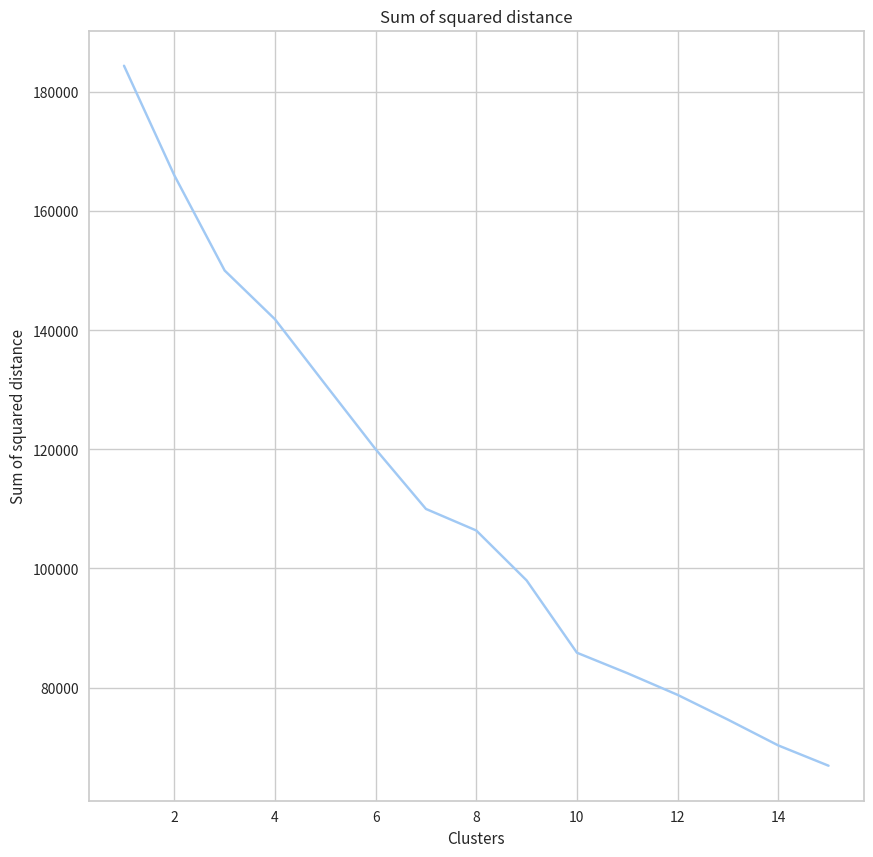

In [309]:
plt.figure(figsize=(10,10))
plt.plot(ds_error["NumberofCluster"],ds_error["Error"])
plt.title("Sum of squared distance")
plt.xlabel("Clusters")
plt.ylabel("Sum of squared distance")

In [323]:
clus=KMeans(3)
clus.fit(df_scaled)
cluster_kmeans=[i+1 for i in clus.labels_]
df_customer["ClusterKmeans"]=cluster_kmeans
df_customer.head()

,customer_id,last_term,first_term,invoice,category,real_quantity,real_sales,sales_sum,quantity_sum,city,state,pop_size,city_type,city_lctn,stock_type,ClusterKmeans
0,E13313,377.0,667.0,64,"Bags, Luggage & Accessories",661,1242.64,19.416250,10.328125,Honolulu,HI,small,sightseeing,other,consignment,3
1,E17315,343.0,665.0,392,Home & Garden,3416,5170.77,13.190740,8.714286,New York,NY,big,metro,east,consignment,1
2,E14606,343.0,680.0,2081,Home & Garden,4792,9137.40,4.390870,2.302739,San Diego,CA,middle,sightseeing,west,consignment,2
3,E15379,511.0,555.0,133,Home & Garden,1537,2211.83,16.630301,11.556391,Dallas,TX,middle,other,south,consignment,3
4,E17841,343.0,668.0,5698,Home & Garden,16215,28765.93,5.048426,2.845735,New York,NY,big,metro,east,consignment,1


In [324]:
df_customer['ClusterKmeans'].unique()

array([3, 1, 2])

In [325]:
ds_summary_km=df_customer.groupby("ClusterKmeans").agg(['min','mean','max'])
level0=ds_summary_km.columns.get_level_values(0)
level1=ds_summary_km.columns.get_level_values(1)
ds_summary_km.columns=level0+"_"+level1
ds_summary_km.reset_index(inplace=True)
ds_summary_km.round(3)

,ClusterKmeans,last_term_min,last_term_mean,last_term_max,first_term_min,first_term_mean,first_term_max,invoice_min,invoice_mean,invoice_max,...,real_quantity_max,real_sales_min,real_sales_mean,real_sales_max,sales_sum_min,sales_sum_mean,sales_sum_max,quantity_sum_min,quantity_sum_mean,quantity_sum_max
0,1,320.0,450.630,681.0,342.0,557.254,681.0,1,79.383,5698,...,52507,0.0,1669.163,201842.79,0.0,28.774,2033.10,0.0,17.107,684.0
1,2,320.0,445.438,680.0,343.0,564.254,681.0,1,80.748,2350,...,61542,0.0,1849.422,168685.20,0.0,35.569,2572.84,0.0,20.210,1350.0
2,3,320.0,444.827,679.0,343.0,558.439,681.0,1,82.534,1858,...,49412,0.0,1442.912,49800.70,0.0,36.101,3861.00,0.0,26.090,4300.0


In [348]:
ds_summary_km=df_customer.groupby("ClusterKmeans").agg(['mean'])
level0=ds_summary_km.columns.get_level_values(0)
level1=ds_summary_km.columns.get_level_values(1)
ds_summary_km.columns=level0+"_"+level1
ds_summary_km.reset_index(inplace=True)
ds_summary_km.round(3)

,ClusterKmeans,last_term_mean,first_term_mean,invoice_mean,real_quantity_mean,real_sales_mean,sales_sum_mean,quantity_sum_mean
0,1,450.630,557.254,79.383,946.122,1669.163,28.774,17.107
1,2,445.438,564.254,80.748,1061.493,1849.422,35.569,20.210
2,3,444.827,558.439,82.534,913.223,1442.912,36.101,26.090


In [335]:
ds_summary_km.columns

Index(['ClusterKmeans', 'last_term_min', 'last_term_mean', 'last_term_max',
       'first_term_min', 'first_term_mean', 'first_term_max', 'invoice_min',
       'invoice_mean', 'invoice_max', 'real_quantity_min',
       'real_quantity_mean', 'real_quantity_max', 'real_sales_min',
       'real_sales_mean', 'real_sales_max', 'sales_sum_min', 'sales_sum_mean',
       'sales_sum_max', 'quantity_sum_min', 'quantity_sum_mean',
       'quantity_sum_max'],
      dtype='object')

In [370]:
customer_info=df_customer.drop('ClusterKmeans',axis=1,inplace=False).to_csv('/home/piai/다운로드/customer_info')

In [371]:
df_customer.head(10)

,customer_id,last_term,first_term,invoice,category,real_quantity,real_sales,sales_sum,quantity_sum,city,state,pop_size,city_type,city_lctn,stock_type,ClusterKmeans
0,E13313,377.0,667.0,64,"Bags, Luggage & Accessories",661,1242.64,19.416250,10.328125,Honolulu,HI,small,sightseeing,other,consignment,3
1,E17315,343.0,665.0,392,Home & Garden,3416,5170.77,13.190740,8.714286,New York,NY,big,metro,east,consignment,1
2,E14606,343.0,680.0,2081,Home & Garden,4792,9137.40,4.390870,2.302739,San Diego,CA,middle,sightseeing,west,consignment,2
3,E15379,511.0,555.0,133,Home & Garden,1537,2211.83,16.630301,11.556391,Dallas,TX,middle,other,south,consignment,3
4,E17841,343.0,668.0,5698,Home & Garden,16215,28765.93,5.048426,2.845735,New York,NY,big,metro,east,consignment,1
5,E15039,373.0,556.0,1269,Home & Garden,8397,17809.08,14.033948,6.617021,San Diego,CA,middle,sightseeing,west,consignment,2
6,E16029,380.0,429.0,190,Home & Garden,26015,48213.81,253.756895,136.921053,New York,NY,big,metro,east,consignment,1
7,E13397,414.0,638.0,38,Home & Garden,429,1539.18,40.504737,11.289474,Dallas,TX,middle,other,south,buying,3
8,E13680,343.0,666.0,132,Home & Garden,848,1506.56,11.413333,6.424242,Houston,TX,middle,other,south,consignment,3
9,E14732,350.0,374.0,147,Home & Garden,1403,2692.59,18.316939,9.544218,New York,NY,big,metro,east,consignment,1


In [315]:
df_customer.columns

Index(['customer_id', 'last_term', 'first_term', 'invoice', 'category',
       'real_quantity', 'real_sales', 'sales_sum', 'quantity_sum', 'city',
       'state', 'pop_size', 'city_type', 'city_lctn', 'stock_type',
       'ClusterKmeans'],
      dtype='object')

array([[<AxesSubplot:title={'center':'last_term'}, xlabel='ClusterKmeans'>,
        <AxesSubplot:title={'center':'first_term'}, xlabel='ClusterKmeans'>,
        <AxesSubplot:title={'center':'invoice'}, xlabel='ClusterKmeans'>],
       [<AxesSubplot:title={'center':'real_quantity'}, xlabel='ClusterKmeans'>,
        <AxesSubplot:title={'center':'real_sales'}, xlabel='ClusterKmeans'>,
        <AxesSubplot:title={'center':'sales_sum'}, xlabel='ClusterKmeans'>],
       [<AxesSubplot:title={'center':'quantity_sum'}, xlabel='ClusterKmeans'>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

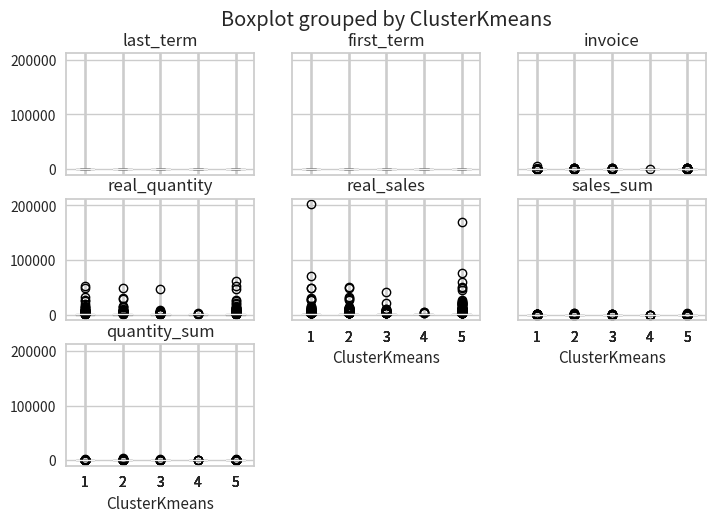

In [318]:
df_customer.boxplot(column=['last_term', 'first_term', 'invoice',
       'real_quantity', 'real_sales', 'sales_sum', 'quantity_sum'],by="ClusterKmeans")

In [320]:
cls_k=KMeans(3).fit_predict(df_date_dummy)
sil_score=silhouette_score(df_date_dummy,cls_k)
print("k-평균(군집 개수=3) 실루엣 계수=", format(round(sil_score,3)))
cls_k=KMeans(4).fit_predict(df_date_dummy)
sil_score=silhouette_score(df_date_dummy,cls_k)
print("k-평균(군집 개수=10) 실루엣 계수=", format(round(sil_score,4)))
cls_k=KMeans(5).fit_predict(df_date_dummy)
sil_score=silhouette_score(df_date_dummy,cls_k)
print("k-평균(군집 개수=10) 실루엣 계수=", format(round(sil_score,5)))

k-평균(군집 개수=3) 실루엣 계수= 0.946
k-평균(군집 개수=10) 실루엣 계수= 0.8461
k-평균(군집 개수=10) 실루엣 계수= 0.77288


In [368]:
cls_k=KMeans(8).fit_predict(df_date_dummy)
sil_score=silhouette_score(df_date_dummy,cls_k)
print("k-평균(군집 개수=10) 실루엣 계수=", format(round(sil_score,5)))

k-평균(군집 개수=10) 실루엣 계수= 0.67689


array([<AxesSubplot:title={'center':'last_term'}, xlabel='ClusterKmeans'>,
       <AxesSubplot:title={'center':'first_term'}, xlabel='ClusterKmeans'>],
      dtype=object)

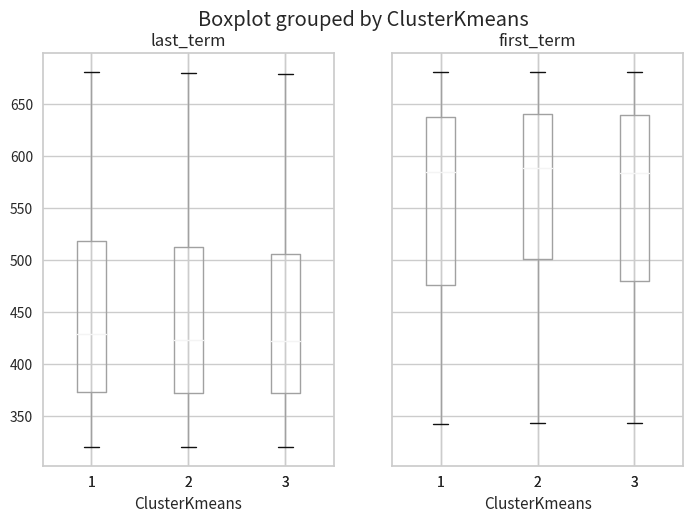

In [326]:
df_customer.boxplot(column=['last_term', 'first_term'],by="ClusterKmeans")

In [327]:
df_customer.columns

Index(['customer_id', 'last_term', 'first_term', 'invoice', 'category',
       'real_quantity', 'real_sales', 'sales_sum', 'quantity_sum', 'city',
       'state', 'pop_size', 'city_type', 'city_lctn', 'stock_type',
       'ClusterKmeans'],
      dtype='object')

<AxesSubplot:title={'center':'invoice'}, xlabel='ClusterKmeans'>

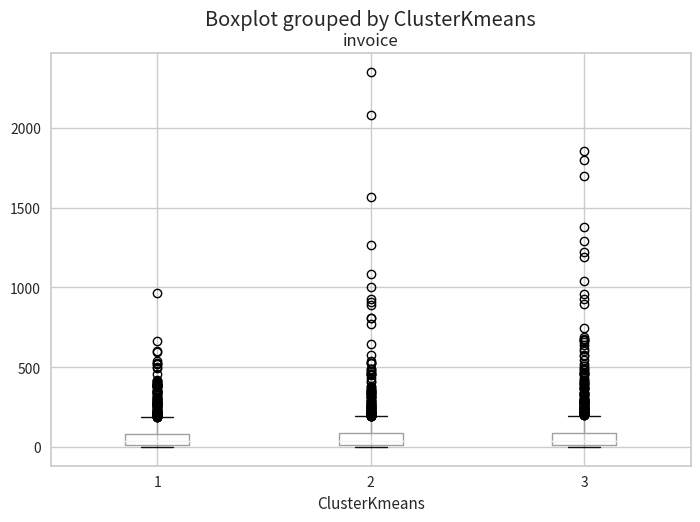

In [334]:
df_customer[df_customer['invoice']<5000].boxplot(column=['invoice'],by="ClusterKmeans")

<AxesSubplot:title={'center':'real_quantity'}, xlabel='ClusterKmeans'>

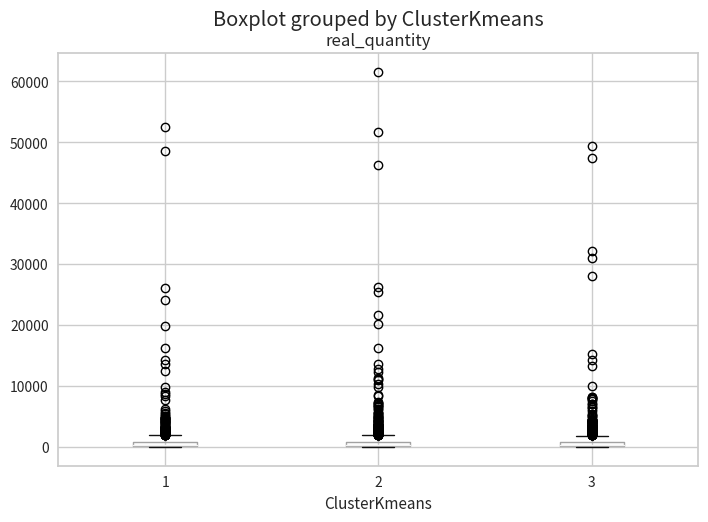

In [336]:
df_customer.boxplot(column=['real_quantity'],by="ClusterKmeans")

<AxesSubplot:title={'center':'real_sales'}, xlabel='ClusterKmeans'>

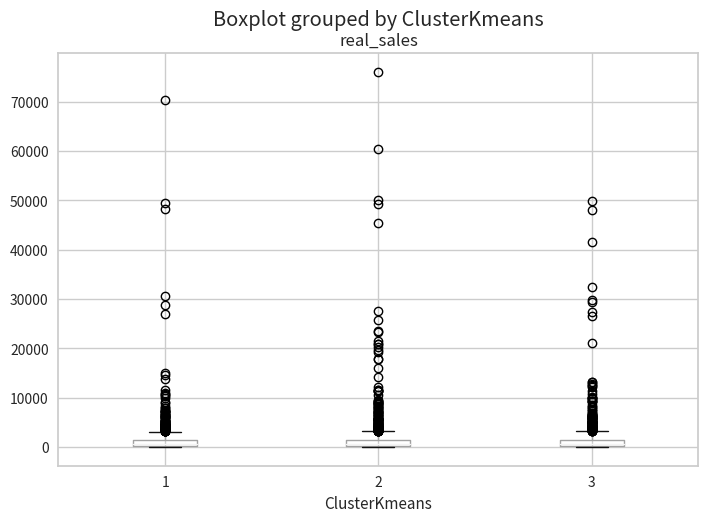

In [338]:
df_customer[df_customer['real_sales']<100000].boxplot(column=['real_sales'],by="ClusterKmeans")

<AxesSubplot:title={'center':'sales_sum'}, xlabel='ClusterKmeans'>

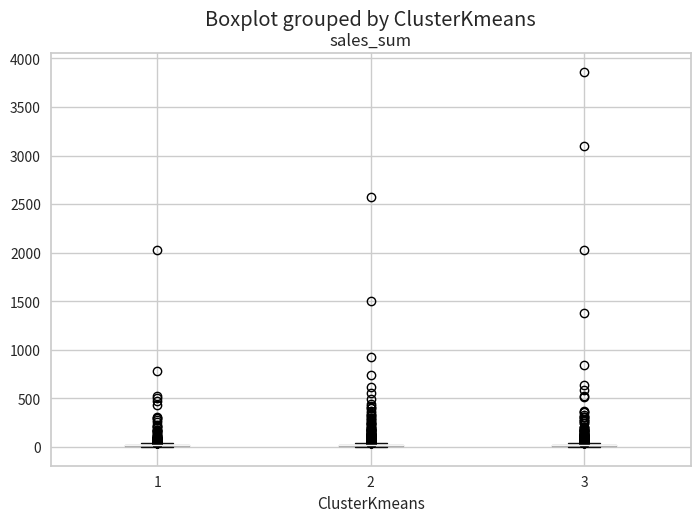

In [339]:
df_customer.boxplot(column=['sales_sum'],by="ClusterKmeans")

<AxesSubplot:title={'center':'quantity_sum'}, xlabel='ClusterKmeans'>

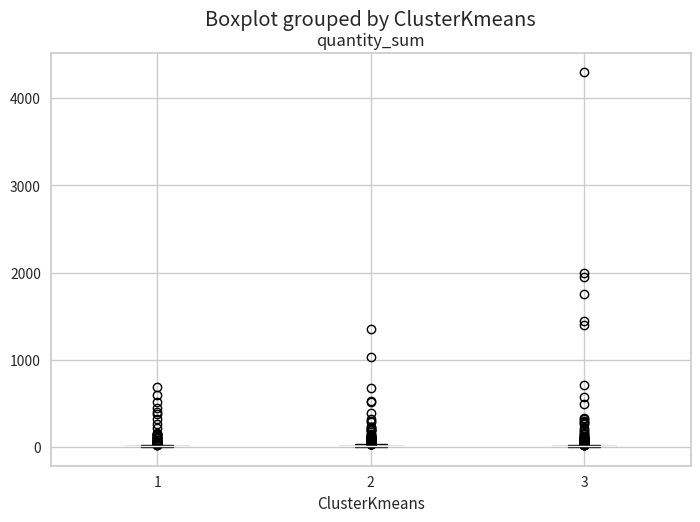

In [340]:
df_customer.boxplot(column=['quantity_sum'],by="ClusterKmeans")

In [341]:
df_customer.groupby('ClusterKmeans')['category'].describe()

,count,unique,top,freq
ClusterKmeans,,,,
1,987,9,Home & Garden,924
2,1134,11,Home & Garden,1036
3,1276,10,Home & Garden,1180


In [342]:
df_customer.groupby('ClusterKmeans')['city'].describe()

,count,unique,top,freq
ClusterKmeans,,,,
1,989,1,New York,989
2,1138,5,Los Angeles,502
3,1289,7,Chicago,343


In [343]:
df_customer.groupby('ClusterKmeans')['state'].describe()

,count,unique,top,freq
ClusterKmeans,,,,
1,989,1,NY,989
2,1138,3,CA,822
3,1289,5,TX,663


In [344]:
df_customer.groupby('ClusterKmeans')['pop_size'].describe()

,count,unique,top,freq
ClusterKmeans,,,,
1,989,1,big,989
2,1138,2,middle,1052
3,1289,2,middle,1189


In [345]:
df_customer.groupby('ClusterKmeans')['city_type'].describe()

,count,unique,top,freq
ClusterKmeans,,,,
1,989,1,metro,989
2,1138,3,metro,502
3,1289,3,other,846


In [346]:
df_customer.groupby('ClusterKmeans')['city_lctn'].describe()

,count,unique,top,freq
ClusterKmeans,,,,
1,989,1,east,989
2,1138,1,west,1138
3,1289,3,south,720


In [347]:
df_customer.groupby('ClusterKmeans')['stock_type'].describe()

,count,unique,top,freq
ClusterKmeans,,,,
1,989,2,consignment,932
2,1138,2,consignment,1059
3,1289,2,consignment,1196


In [349]:
df_customer

,customer_id,last_term,first_term,invoice,category,real_quantity,real_sales,sales_sum,quantity_sum,city,state,pop_size,city_type,city_lctn,stock_type,ClusterKmeans
0,E13313,377.0,667.0,64,"Bags, Luggage & Accessories",661,1242.64,19.416250,10.328125,Honolulu,HI,small,sightseeing,other,consignment,3
1,E17315,343.0,665.0,392,Home & Garden,3416,5170.77,13.190740,8.714286,New York,NY,big,metro,east,consignment,1
2,E14606,343.0,680.0,2081,Home & Garden,4792,9137.40,4.390870,2.302739,San Diego,CA,middle,sightseeing,west,consignment,2
3,E15379,511.0,555.0,133,Home & Garden,1537,2211.83,16.630301,11.556391,Dallas,TX,middle,other,south,consignment,3
4,E17841,343.0,668.0,5698,Home & Garden,16215,28765.93,5.048426,2.845735,New York,NY,big,metro,east,consignment,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3411,E13672,353.0,619.0,12,Lights & Lighting,91,283.65,23.637500,7.583333,San Diego,CA,middle,sightseeing,west,consignment,2
3412,E15118,476.0,522.0,1,NaN,1440,244.80,244.800000,1440.000000,Philadelphia,PA,middle,other,east,consignment,3
3413,E17747,454.0,468.0,1,Home & Garden,11,65.45,65.450000,11.000000,Houston,TX,middle,other,south,consignment,3
3414,E18233,667.0,679.0,1,NaN,4,440.00,440.000000,4.000000,San Diego,CA,middle,sightseeing,west,consignment,2


In [350]:
df_three=df_customer[df_customer['ClusterKmeans']==3]

In [351]:
df_two=df_customer[df_customer['ClusterKmeans']==2]
df_one=df_customer[df_customer['ClusterKmeans']==1]

In [352]:
df_th=df_three['real_quantity']
df_tw=df_two['real_quantity']
df_on=df_one['real_quantity']

In [353]:
statistic,p=stats.shapiro(df_th)
print("statistic={},p-value={}".format(statistic,p))

statistic=0.2461962103843689,p-value=0.0


In [354]:
print(mannwhitneyu(df_th,df_tw))

MannwhitneyuResult(statistic=727585.5, pvalue=0.7339642077712296)


In [355]:
print(mannwhitneyu(df_th,df_on))

MannwhitneyuResult(statistic=641075.5, pvalue=0.8138129670493168)


In [357]:
print(mannwhitneyu(df_tw,df_on))

MannwhitneyuResult(statistic=569825.0, pvalue=0.616089822828319)


In [358]:
df_th=df_three['real_sales']
df_tw=df_two['real_sales']
df_on=df_one['real_sales']

In [359]:
statistic,p=stats.shapiro(df_th)
print("statistic={},p-value={}".format(statistic,p))

statistic=0.33963191509246826,p-value=0.0


In [360]:
print(mannwhitneyu(df_th,df_tw))

MannwhitneyuResult(statistic=729242.5, pvalue=0.8074824665937212)


In [361]:
print(mannwhitneyu(df_th,df_on))

MannwhitneyuResult(statistic=639068.0, pvalue=0.9151921204973184)


In [362]:
print(mannwhitneyu(df_tw,df_on))

MannwhitneyuResult(statistic=567114.0, pvalue=0.7569386608431596)


In [363]:
df_th=df_three['sales_sum']
df_tw=df_two['sales_sum']
df_on=df_one['sales_sum']

In [364]:
statistic,p=stats.shapiro(df_th)
print("statistic={},p-value={}".format(statistic,p))

statistic=0.11593401432037354,p-value=0.0


In [365]:
print(mannwhitneyu(df_th,df_tw))

MannwhitneyuResult(statistic=716153.5, pvalue=0.315652040091128)


In [366]:
print(mannwhitneyu(df_th,df_on))

MannwhitneyuResult(statistic=634252.5, pvalue=0.8391930428088852)


In [367]:
print(mannwhitneyu(df_tw,df_on))

MannwhitneyuResult(statistic=573575.0, pvalue=0.44317710149253753)
